In [39]:
import pickle
import numpy as np
import matplotlib.pyplot as plt


In [40]:
p = None
with open("metrics.pickle", "rb") as the_file:
    p = pickle.load(the_file)

In [41]:
rmsds = p[1]
smis = p[3][0]

In [42]:
xtb_a, am1_a, xtb_na, am1_na = rmsds

In [43]:
xtb_a = np.hstack(xtb_a)
xtb_na = np.hstack(xtb_na)
am1_a = np.hstack(am1_a)
am1_na = np.hstack(am1_na)

In [96]:
largest_am1_a = np.max(am1_a)
largest_am1_na = np.max(am1_na)
largest_am1 = max(largest_am1_a, largest_am1_na)
bound_am1 = 1.1*largest_am1

largest_xtb_a = np.max(xtb_a)
largest_xtb_na = np.max(xtb_na)
largest_xtb = max(largest_xtb_a, largest_xtb_na)
bound_xtb = 1.1*largest_xtb

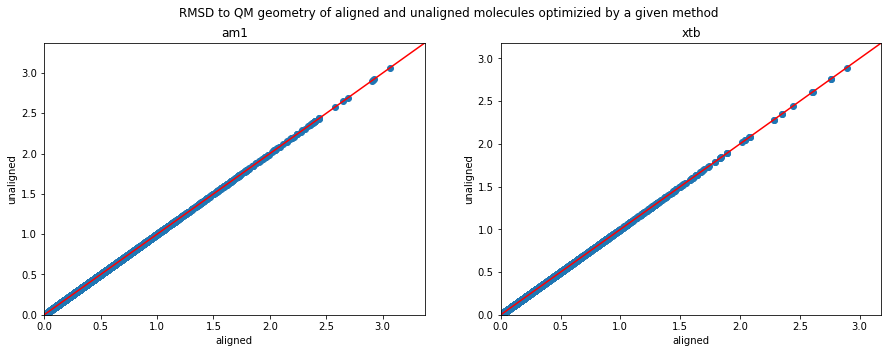

In [106]:
f, ax = plt.subplots(1,2)
ax[0].scatter(am1_a, am1_na)
ax[0].set_ylim(0,bound_am1)
ax[0].set_xlim(0,bound_am1)
ax[0].plot([0,bound_am1],[0,bound_am1], color="red")

ax[1].scatter(xtb_a, xtb_na)
ax[1].set_ylim(0,bound_xtb)
ax[1].set_xlim(0,bound_xtb)
ax[1].plot([0,bound_xtb],[0,bound_xtb], color="red")


ax[0].set_title("am1")
ax[1].set_title("xtb")
f.suptitle("RMSD to QM geometry of aligned and unaligned molecules optimizied by a given method")
ax[0].set_ylabel("unaligned")
ax[0].set_xlabel("aligned")
ax[1].set_ylabel("unaligned")
ax[1].set_xlabel("aligned")
plt.rcParams['figure.figsize'] = [15, 5]

plt.savefig("a_vs_na_scatter.png")
plt.show()

In [54]:
sqerr_am1 = (am1_a - am1_na)**2
sqerr_xtb = (xtb_a - xtb_na)**2

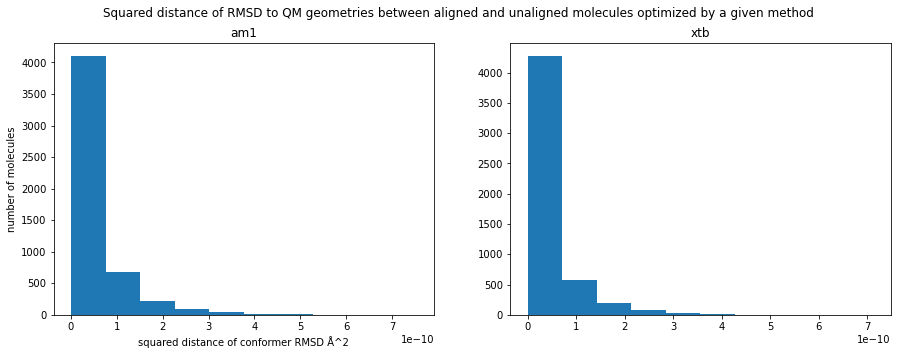

In [107]:
f, ax = plt.subplots(1,2)
ax[0].hist(sqerr_am1)
ax[1].hist(sqerr_xtb)
ax[0].set_title("am1")
ax[1].set_title("xtb")
f.suptitle("Squared distance of RMSD to QM geometries between aligned and "
                "unaligned molecules optimized by a given method")
ax[0].set_ylabel("number of molecules")
ax[0].set_xlabel("squared distance of conformer RMSD Å^2")
plt.rcParams['figure.figsize'] = [15, 5]

plt.savefig("sq_err_hist.png")
plt.show()